In [ ]:
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

--2023-11-17 08:57:51--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘coco.names’

coco.names          100%[===================>]     625  --.-KB/s    in 0s      

2023-11-17 08:57:52 (20.3 MB/s) - ‘coco.names’ saved [625/625]



In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2023-11-17 09:10:36--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  46.0MB/s    in 5.6s    

2023-11-17 09:10:42 (42.0 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg

--2023-11-17 09:11:02--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2023-11-17 09:11:02 (72.7 MB/s) - ‘yolov3.cfg’ saved [8342/8342]



In [ ]:
import cv2
import numpy as np

In [ ]:
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

In [ ]:
with open("coco.names","r") as f:
  classes=f.read().strip().split("\n")
  image = cv2.imread("/content/tab.jpg") #Upload any image
  height, width = image.shape[:2]
  blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
  net.setInput(blob)
  layer_names = net.getUnconnectedOutLayersNames()
  detections = net.forward(layer_names)

In [ ]:
for detection in detections:
  for obj in detection:
    scores = obj[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence >0.5: # Adjust the confidence threshold as needed
      center_x = int(obj[0] * width)
      center_y = int(obj[1] * height)
      w = int(obj[2] * width)
      h = int(obj[3] * height)
      # Calculate bounding box coordinates
      x = int(center_x - w / 2)
      y = int(center_y - h / 2)
      # Draw bounding box and label on the image
      cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
      label = f"{classes[class_id]}: {confidence:.2f}";
      cv2.putText(image, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

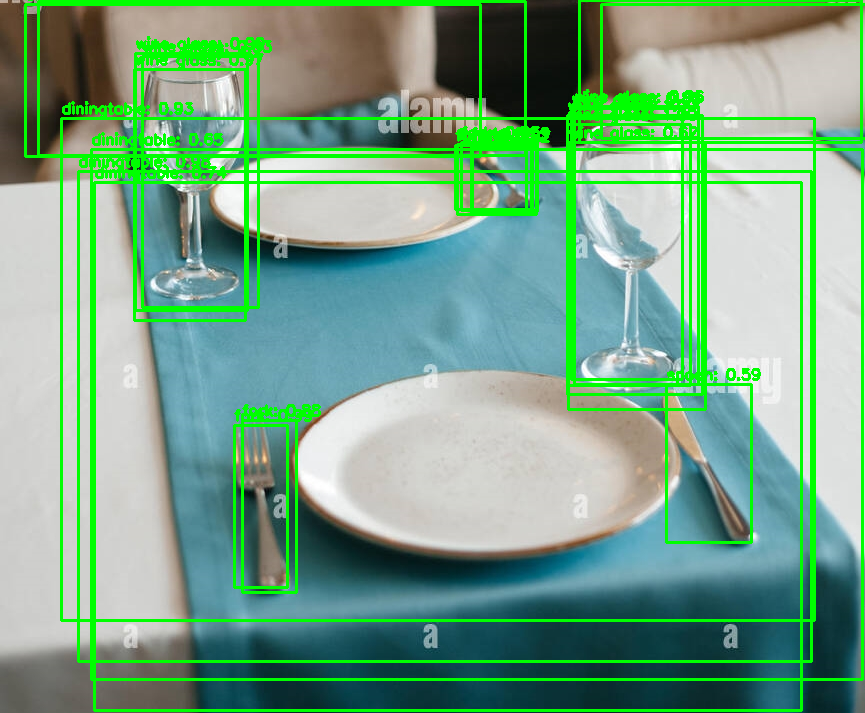

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()